In [1]:
#Hannah Arnow
#RIN:661992262
#Project Code


import numpy as np
import pandas as pd
import tensorflow as tf
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


data = pd.read_csv("Qmpp.csv")
#print(data)

data_to_vis = data[['Top Length (m)','Film Concentration (kg/m^3)','Short Side Position (m)','Qmpp (MWh)']]

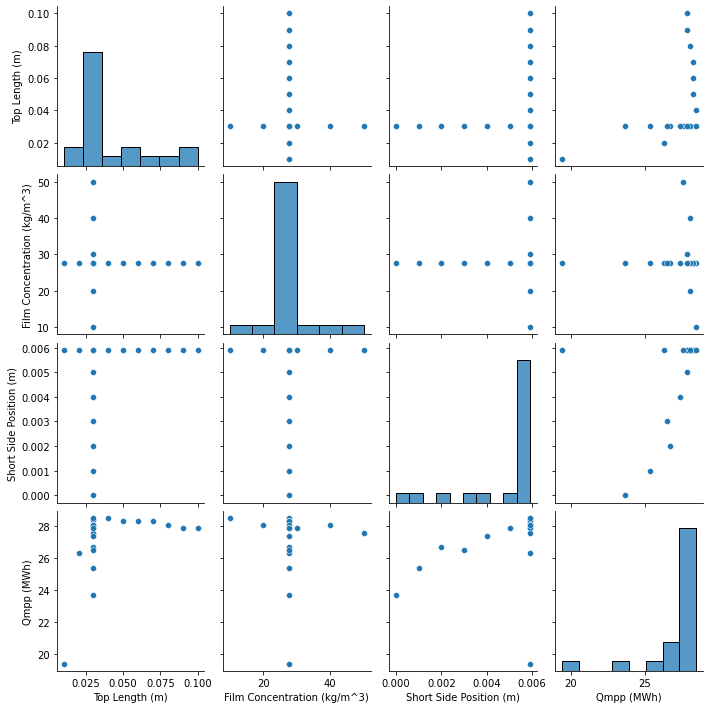

In [2]:
import seaborn as sns
sns.pairplot(data_to_vis)

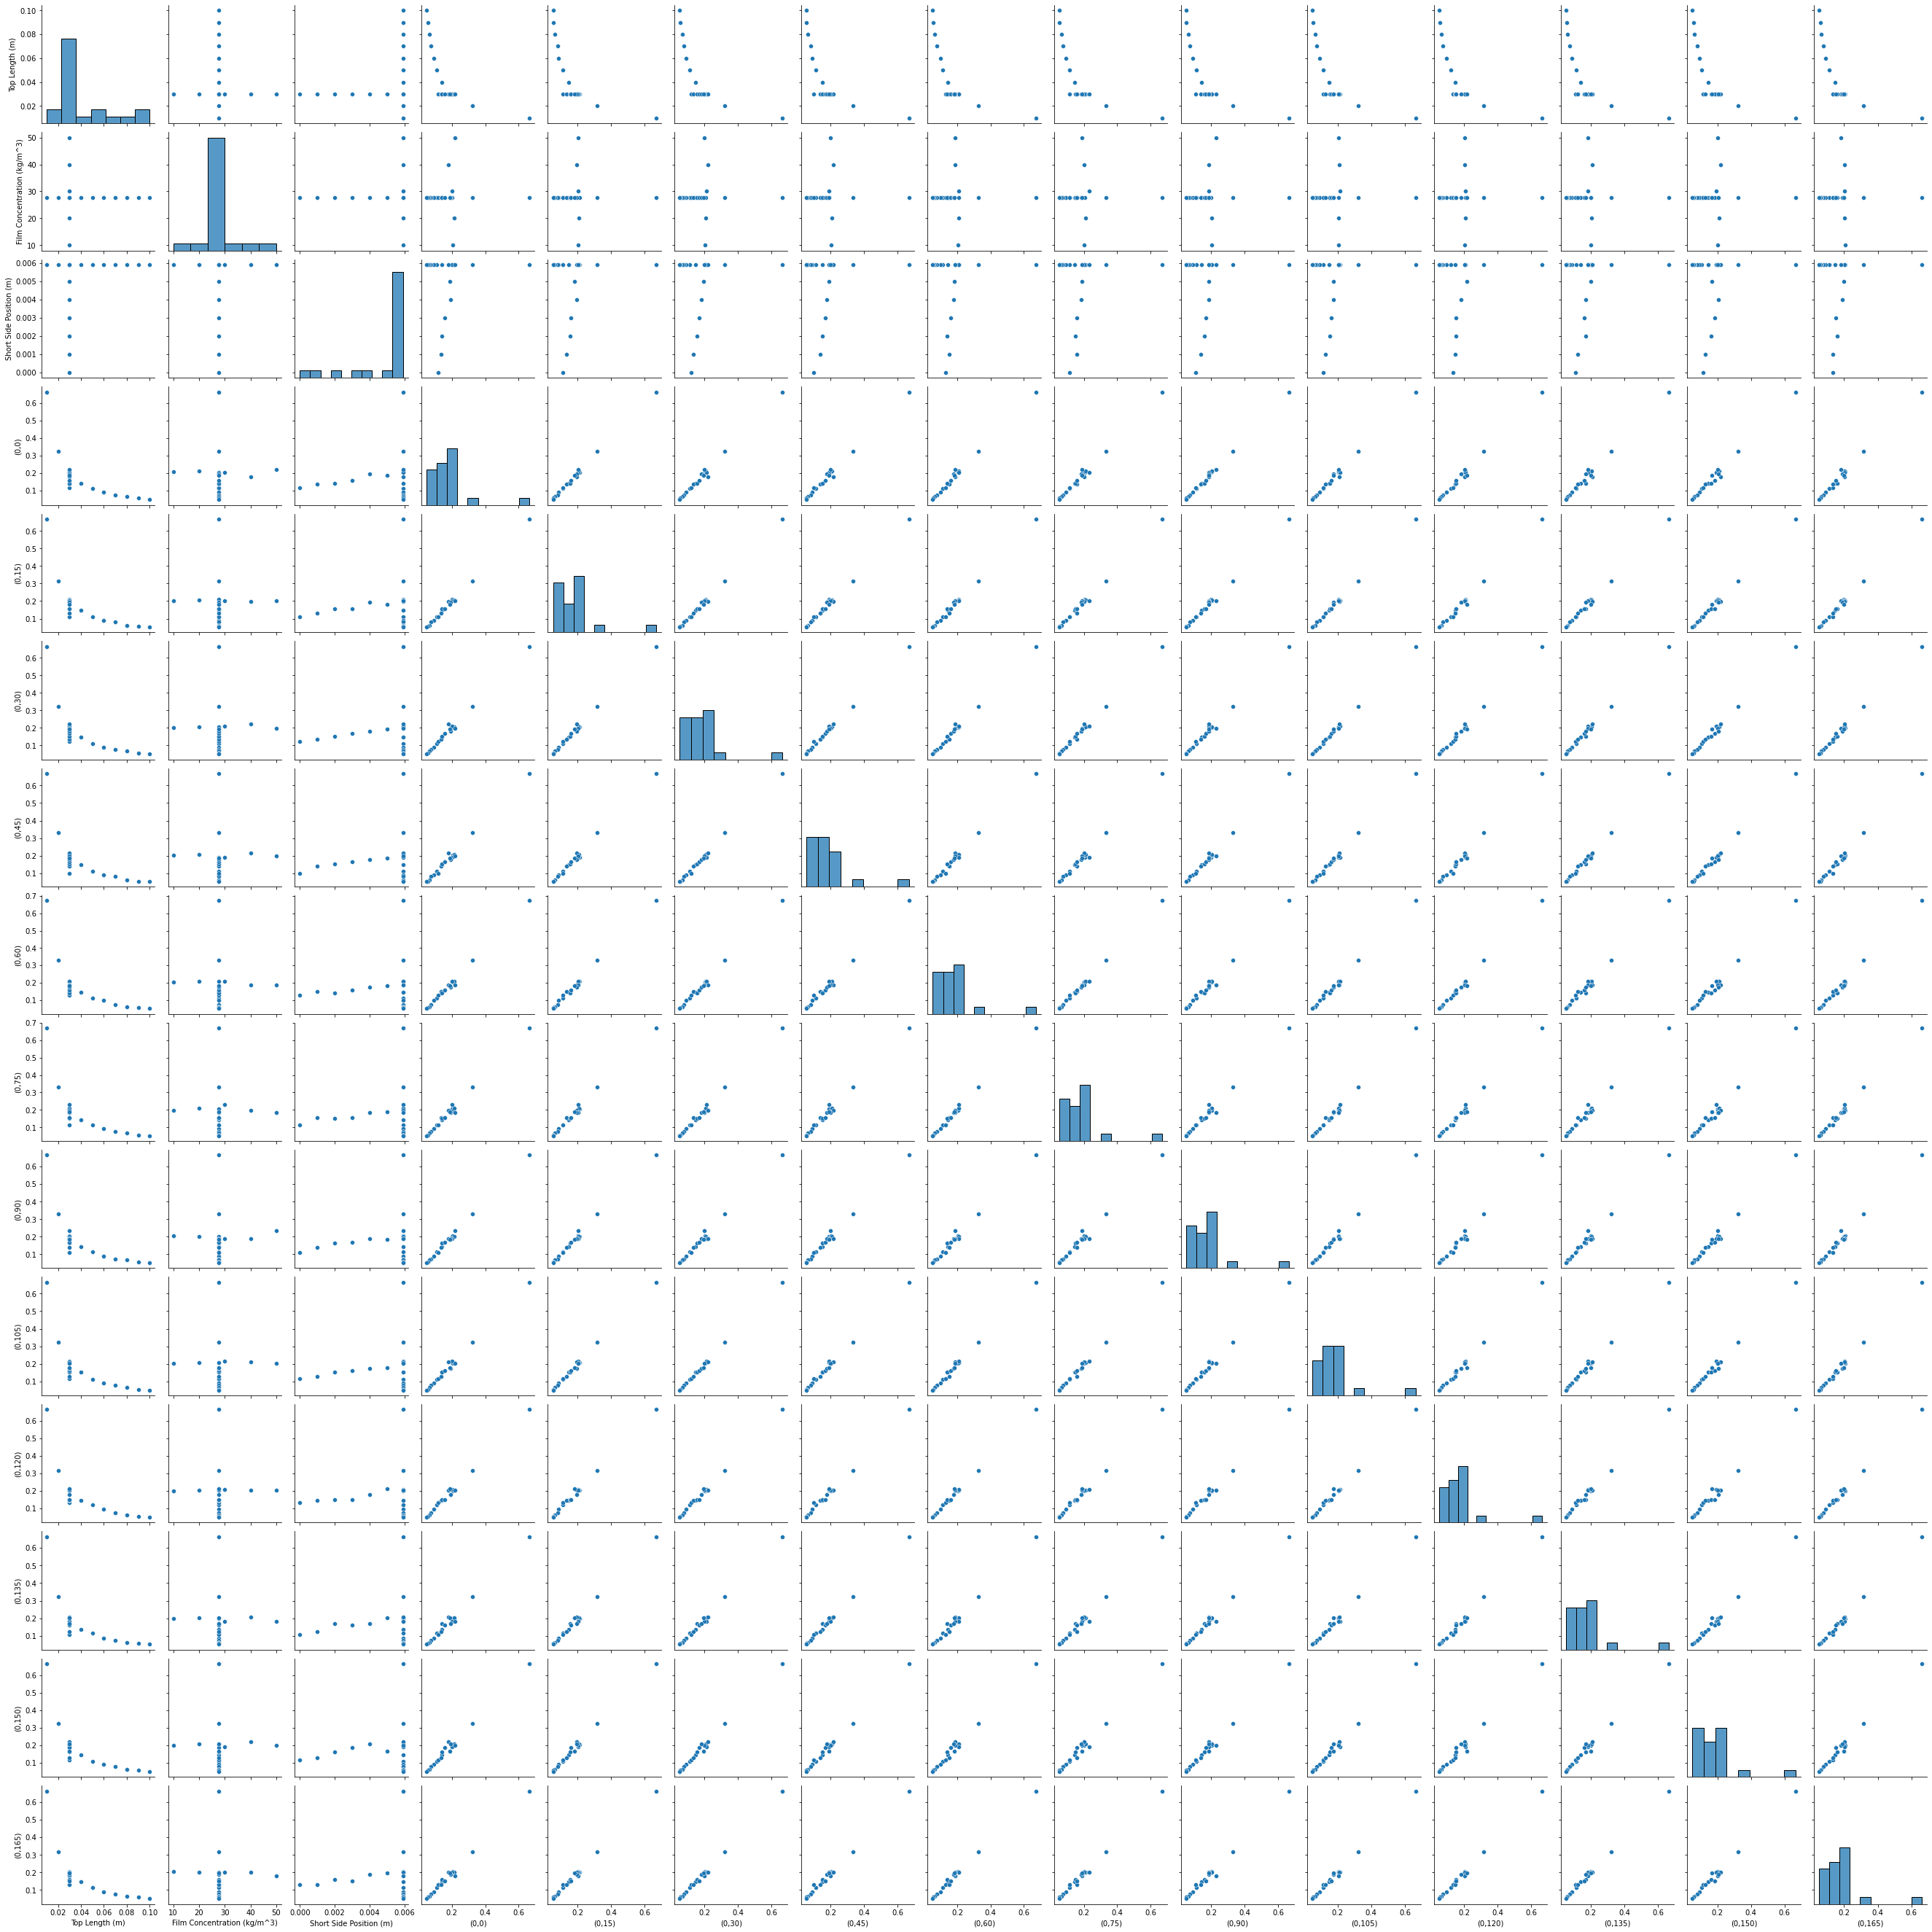

In [3]:
data_to_vis_2 = data.iloc[:,1:16]

sns.pairplot(data_to_vis_2)

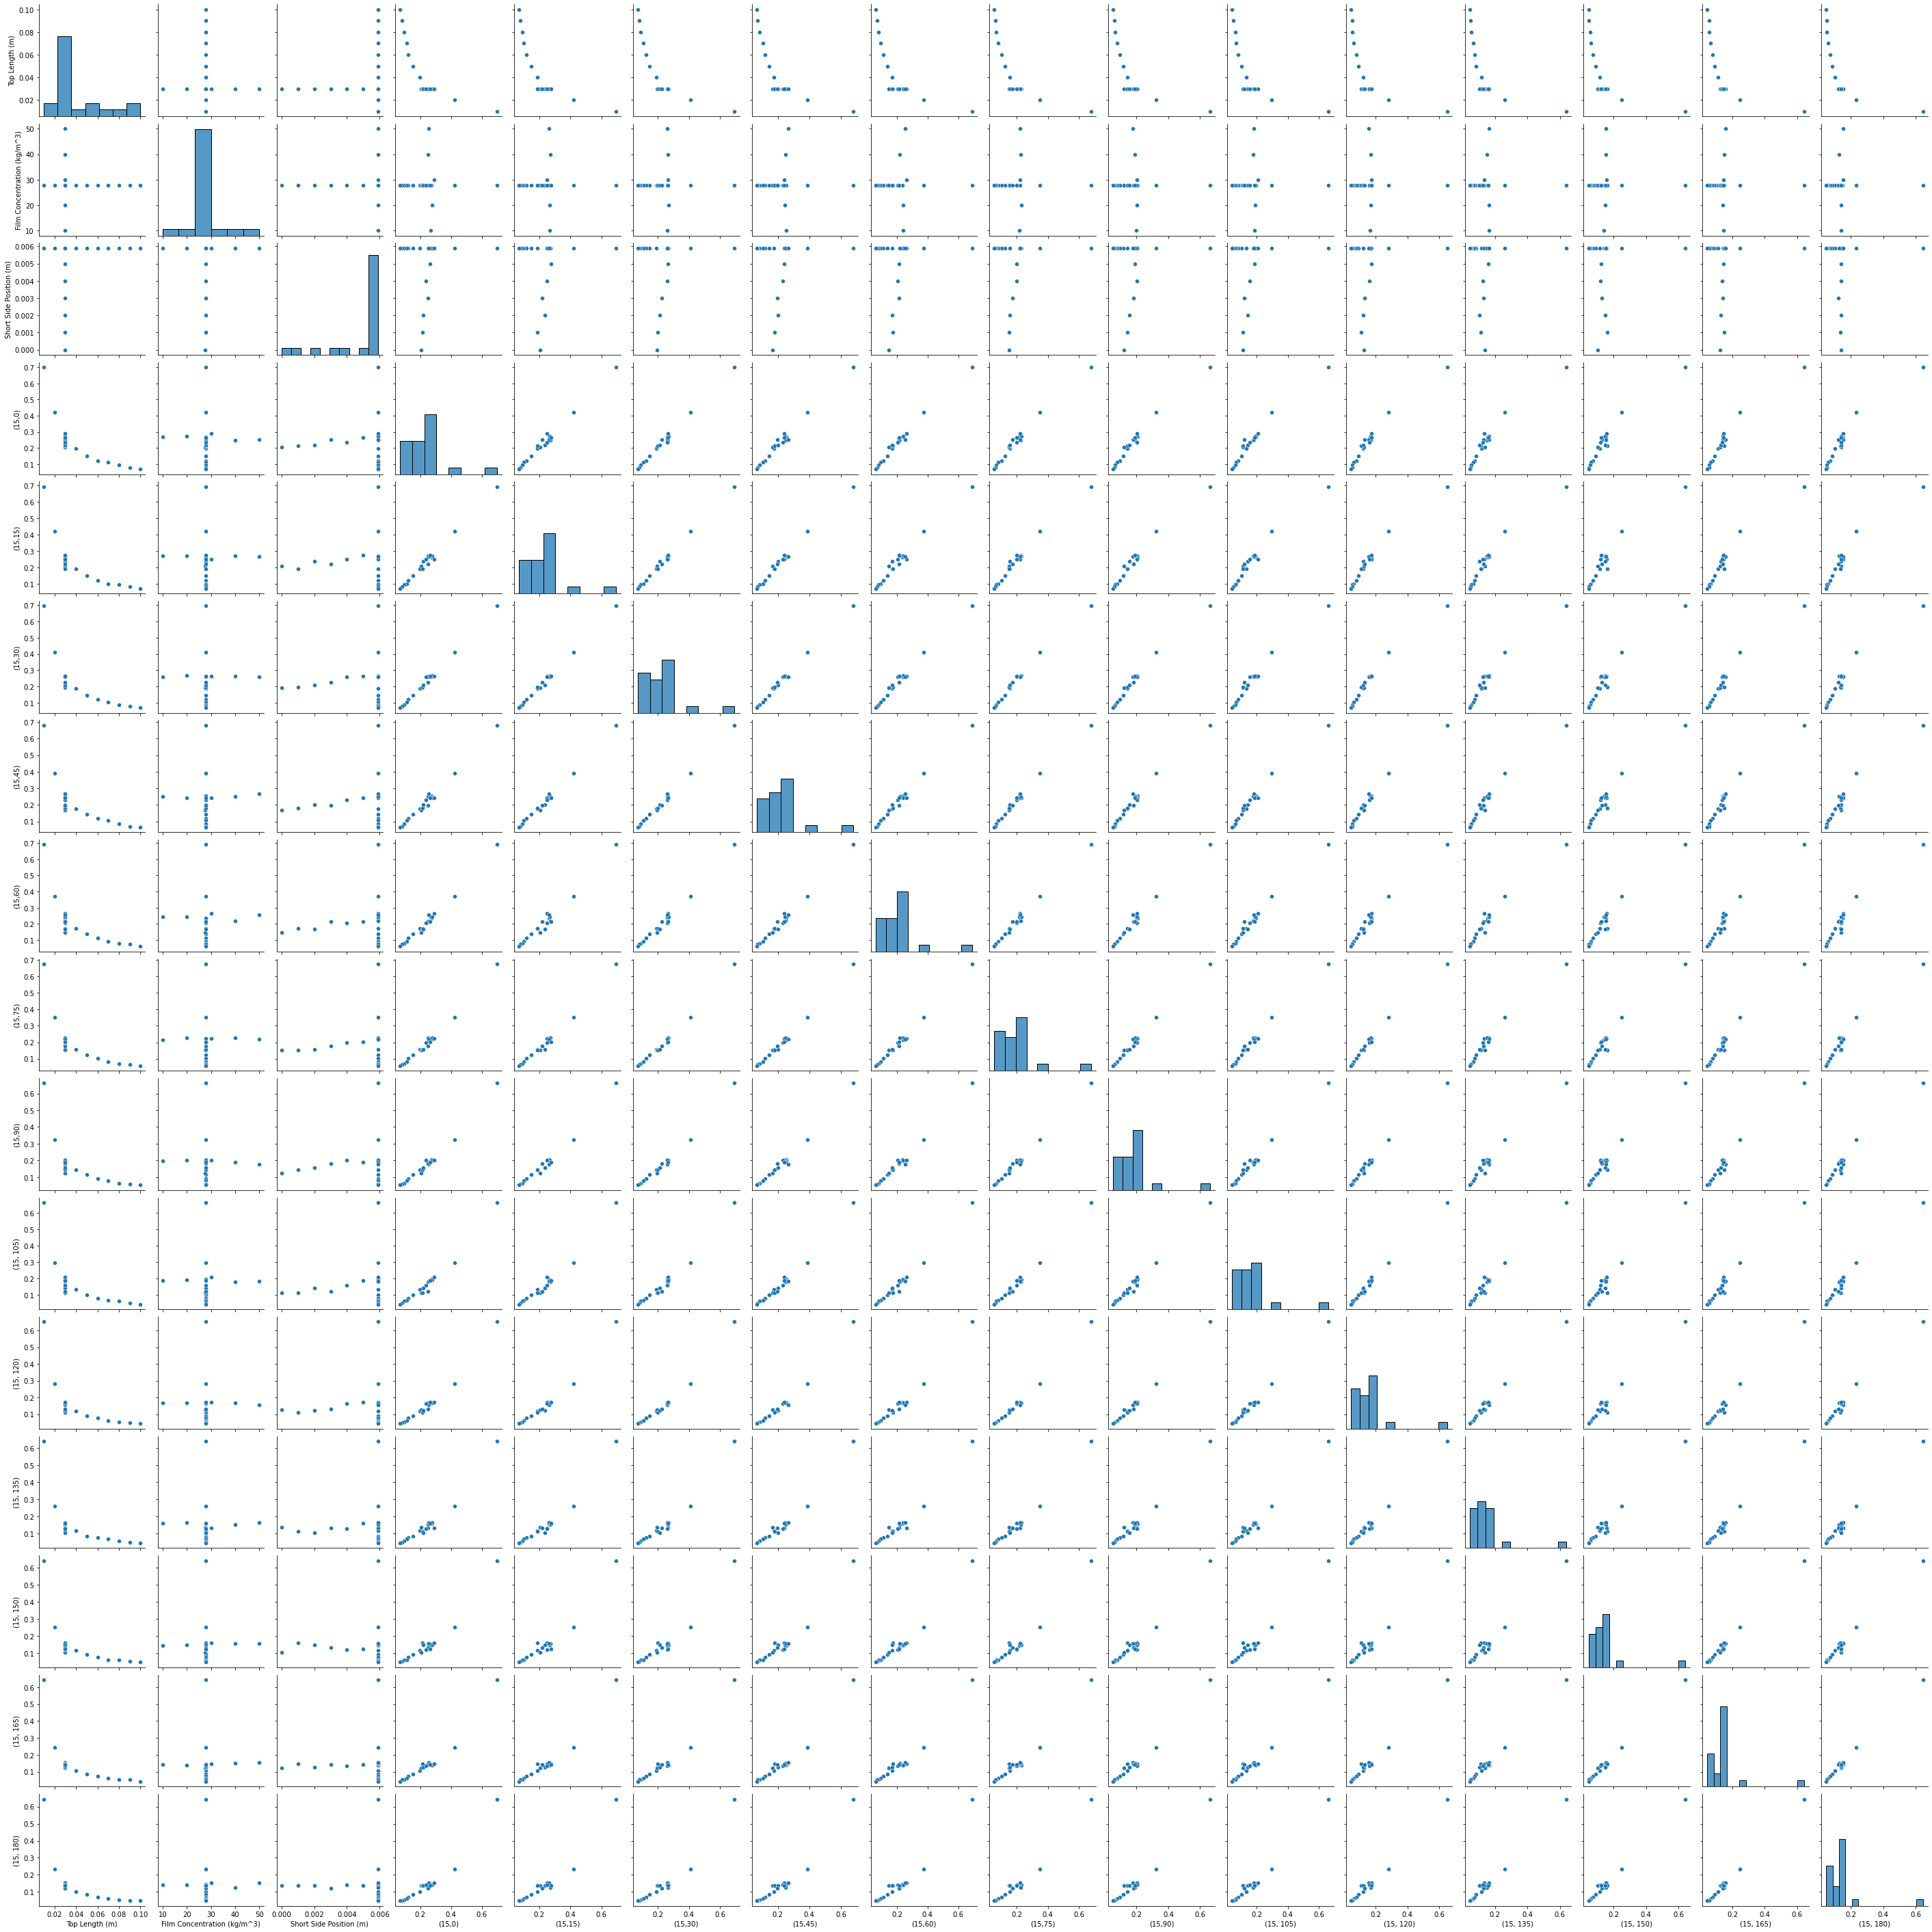

In [4]:
data_to_vis_3 = data.iloc[:,[1,2,3,17,18,19,20,21,22,23,24,25,26,27,28,29]]

sns.pairplot(data_to_vis_3)

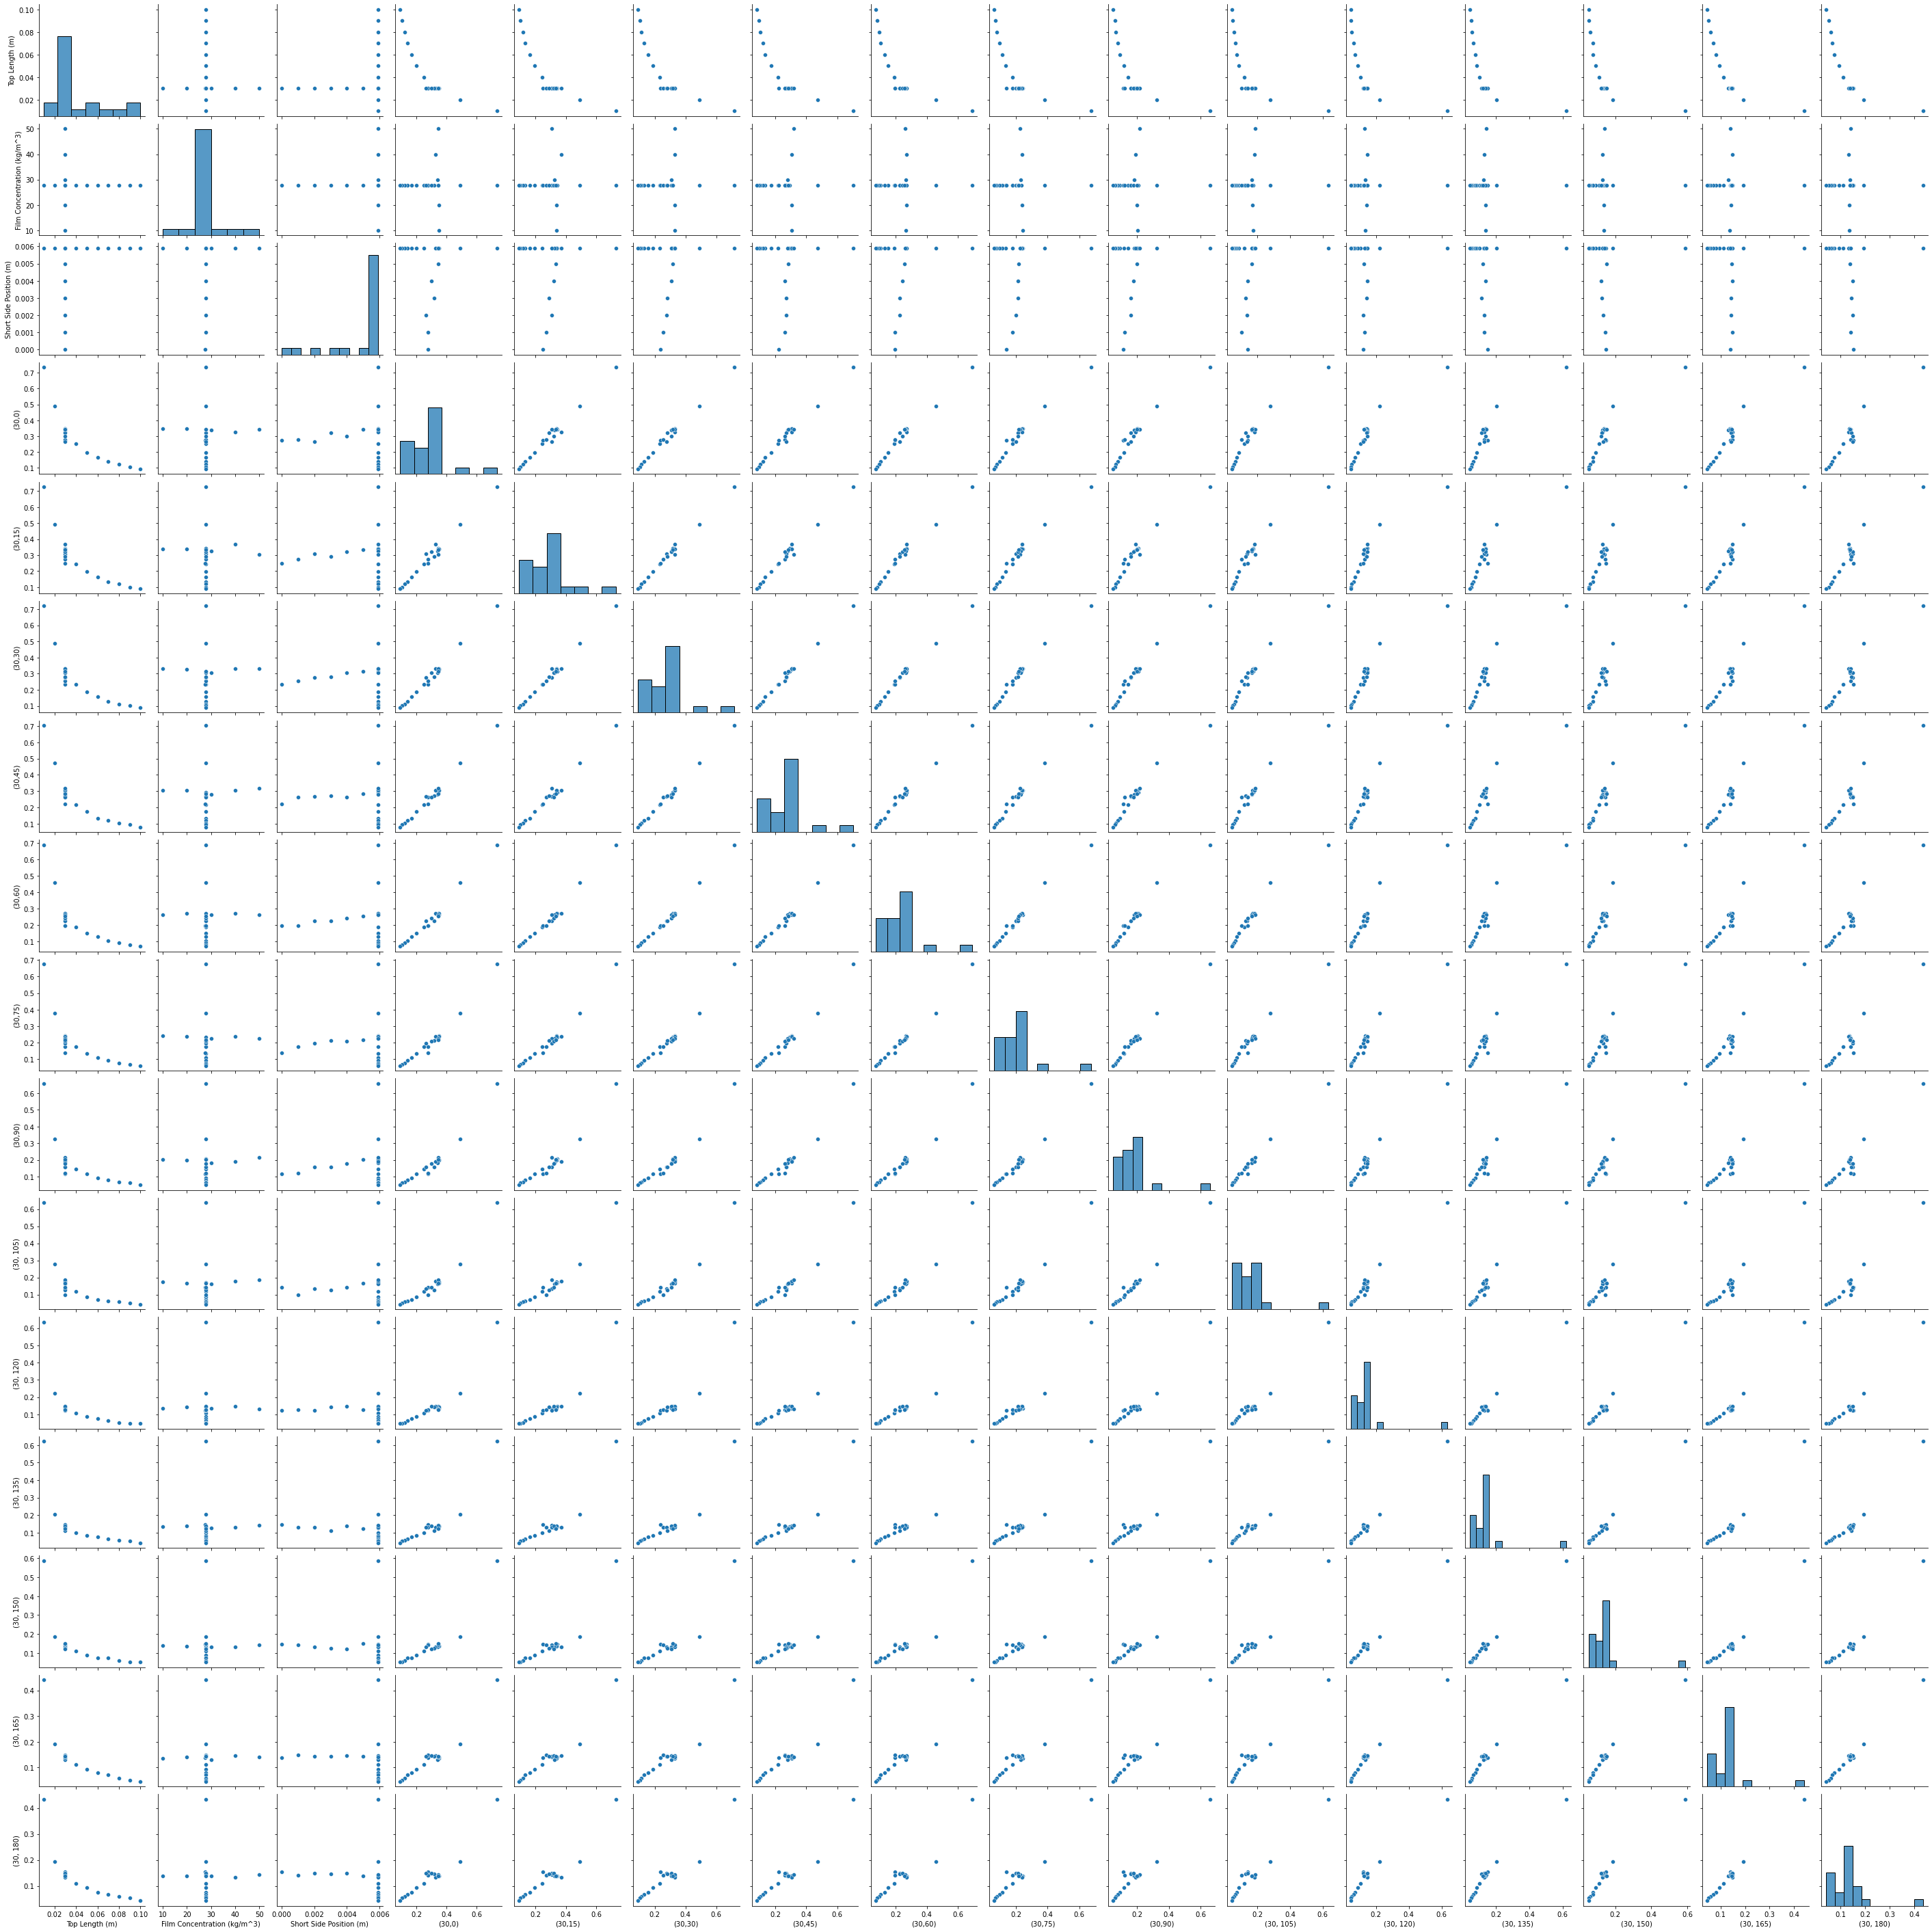

In [5]:
data_to_vis_4 = data.iloc[:,[1,2,3,30,31,32,33,34,35,36,37,38,39,40,41,42]]

sns.pairplot(data_to_vis_4)

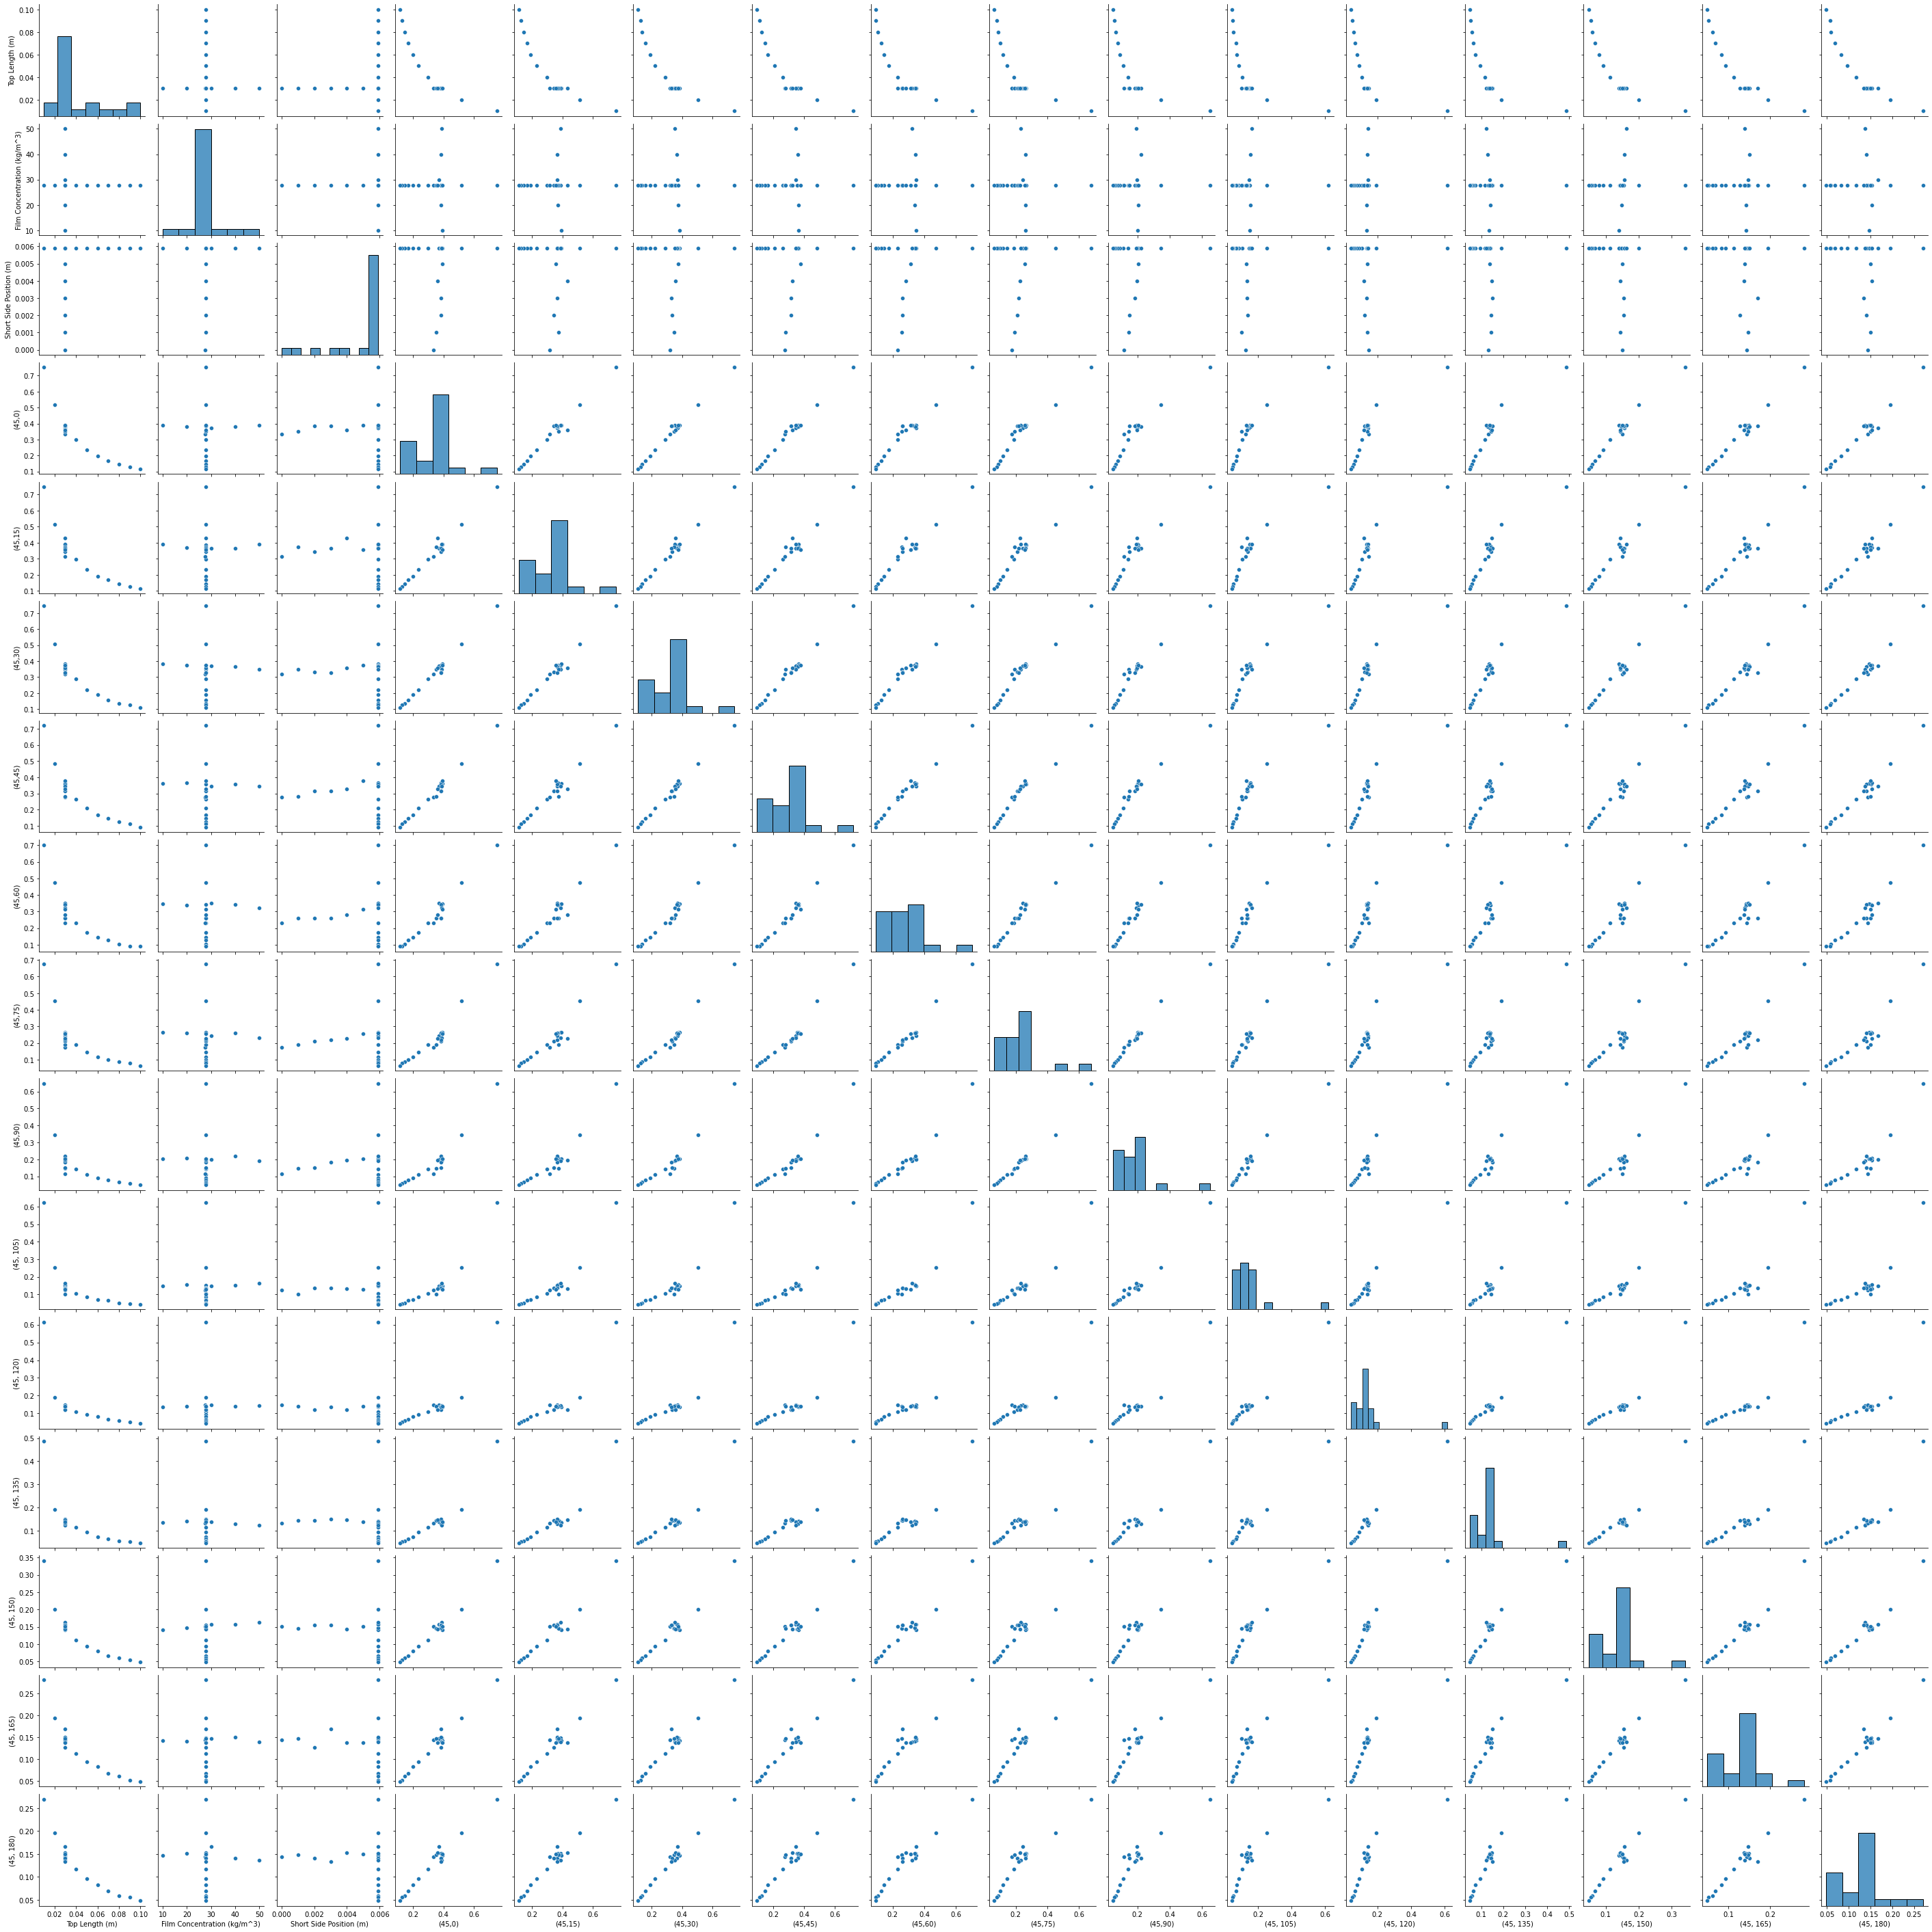

In [6]:
data_to_vis_5 = data.iloc[:,[1,2,3,43,44,45,46,47,48,49,50,51,52,53,54,55]]

sns.pairplot(data_to_vis_5)

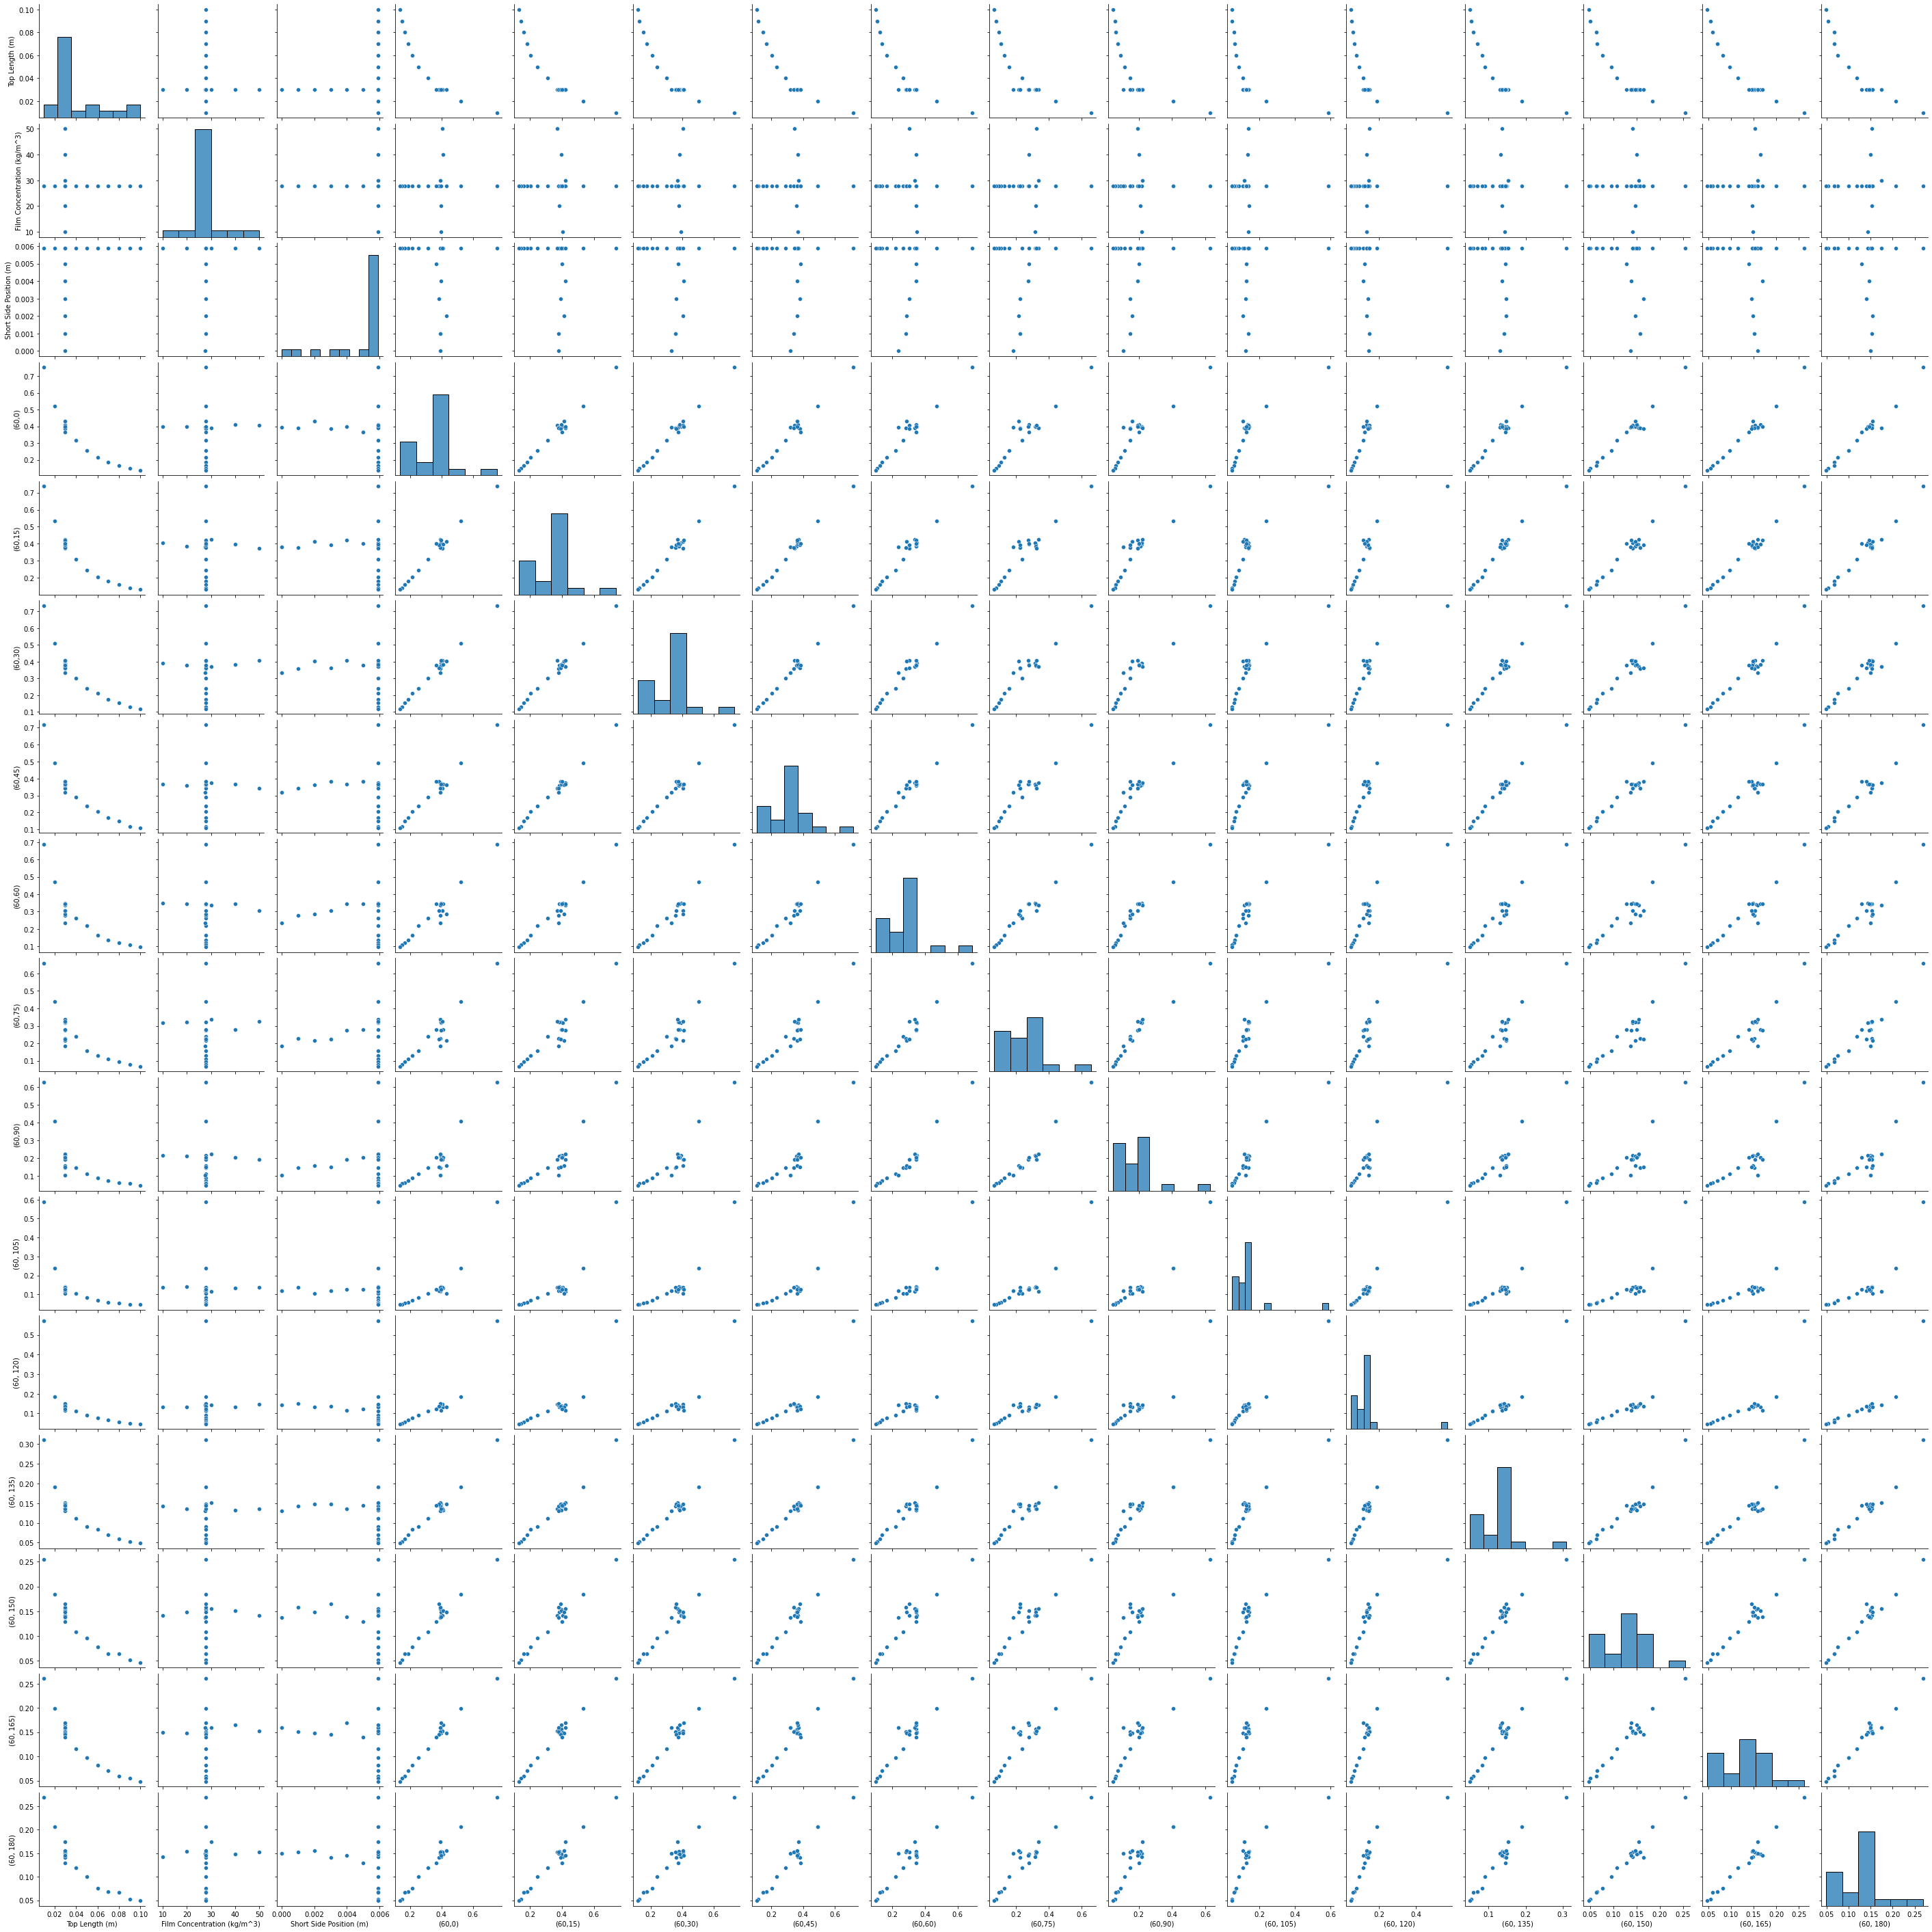

In [7]:
data_to_vis_6 = data.iloc[:,[1,2,3,56,57,58,59,60,61,62,63,64,65,66,67,68]]

sns.pairplot(data_to_vis_6)

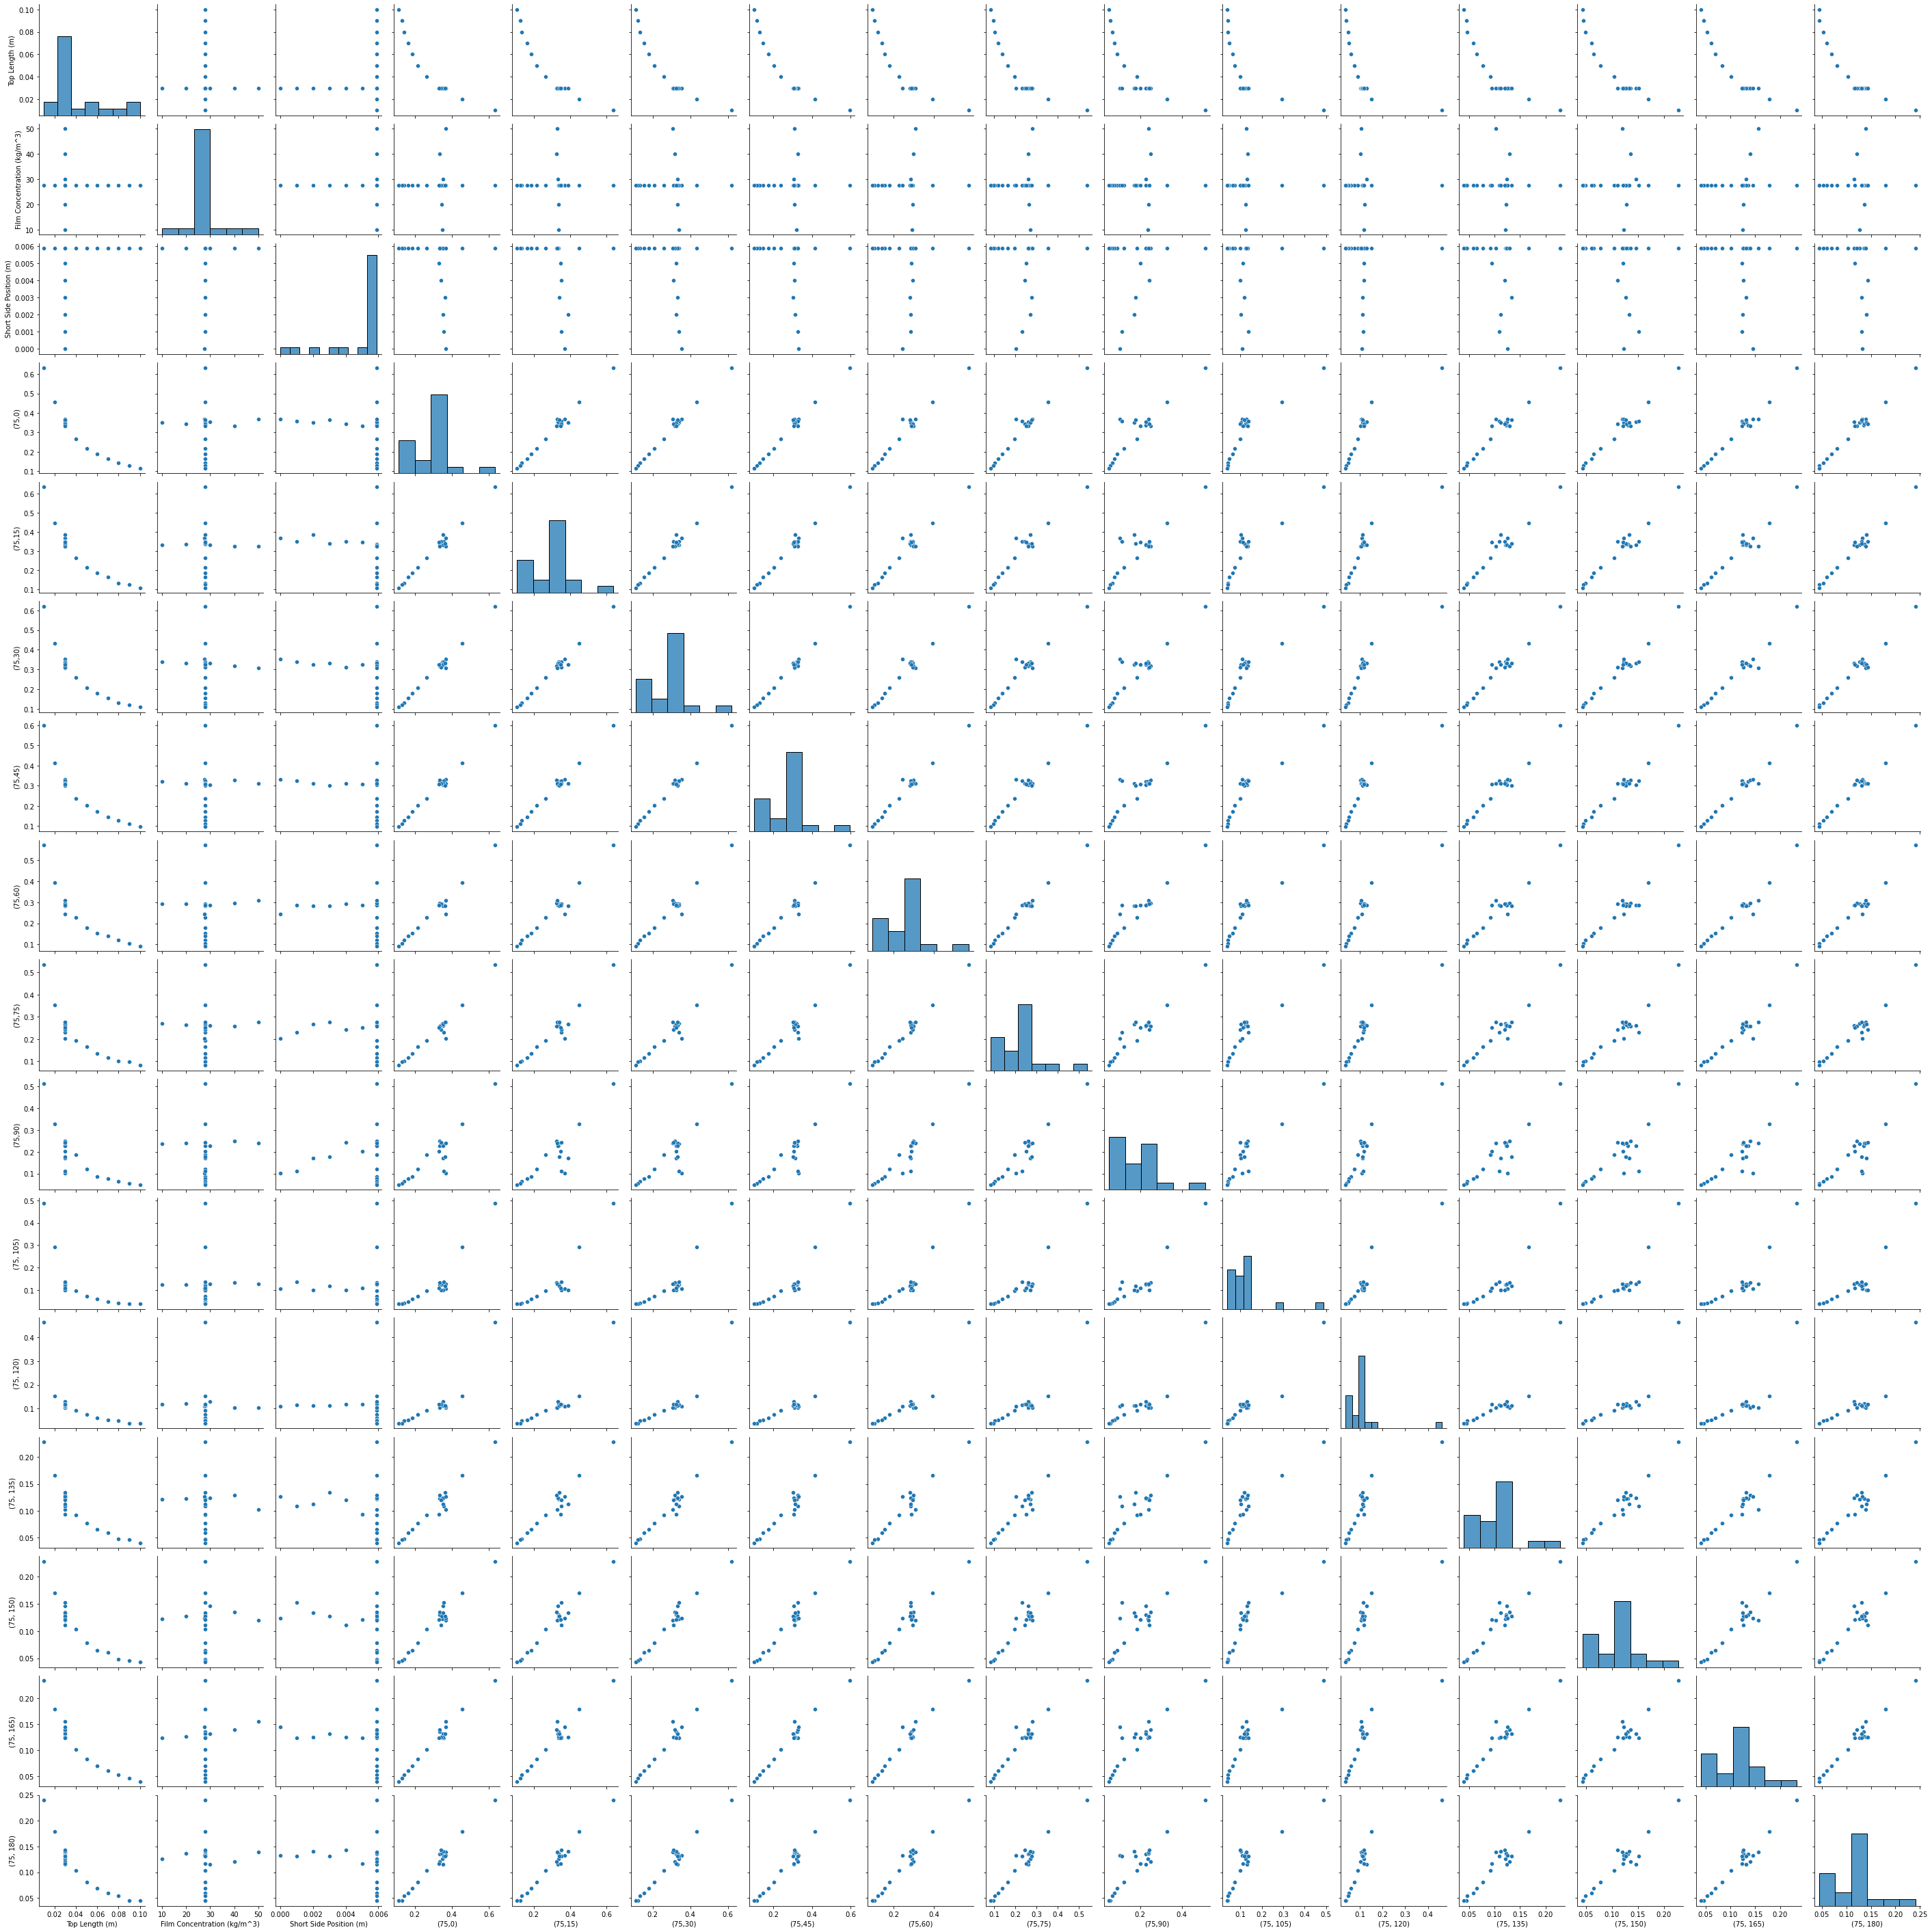

In [8]:
data_to_vis_7 = data.iloc[:,[1,2,3,69,70,71,72,73,74,75,76,77,78,79,80,81]]

sns.pairplot(data_to_vis_7)

In [28]:
X = data[['Top Length (m)','Film Concentration (kg/m^3)','Short Side Position (m)']]
y = data.iloc[:, 4:]

#X = pd.DataFrame.to_numpy(X)
y = pd.DataFrame.to_numpy(y)

print(X.shape)
print(y.shape)

(21, 3)
(21, 78)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test=train_test_split(
 X,y,
 test_size=0.2,
 random_state=123,
 shuffle=True)

norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

print('X_train shape: ',X_train_norm.shape)
print('y_train shape: ',y_train.shape)
print('X_val shape: ',X_test_norm.shape)
print('y_val shape: ',y_test.shape)

X_train shape:  (16, 3)
y_train shape:  (16, 78)
X_val shape:  (5, 3)
y_val shape:  (5, 78)


In [44]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(3, activation='relu', input_shape=(3,)),
 tf.keras.layers.Dense(2, activation='relu'),
 tf.keras.layers.Dense(1)])

model.summary()
opt = optimizers.Adam(learning_rate=0.01)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 3)                 12        
                                                                 
 dense_40 (Dense)            (None, 2)                 8         
                                                                 
 dense_41 (Dense)            (None, 1)                 3         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


Epoch 1/180
1/1 [==============================] - 1s 561ms/step - loss: 1.6140 - val_loss: 175.2471
Epoch 2/180
1/1 [==============================] - 0s 34ms/step - loss: 1.3715 - val_loss: 140.9019
Epoch 3/180
1/1 [==============================] - 0s 33ms/step - loss: 1.1884 - val_loss: 112.1442
Epoch 4/180
1/1 [==============================] - 0s 36ms/step - loss: 1.0449 - val_loss: 88.4315
Epoch 5/180
1/1 [==============================] - 0s 34ms/step - loss: 0.9360 - val_loss: 69.1560
Epoch 6/180
1/1 [==============================] - 0s 36ms/step - loss: 0.8509 - val_loss: 53.7956
Epoch 7/180
1/1 [==============================] - 0s 31ms/step - loss: 0.7776 - val_loss: 41.5547
Epoch 8/180
1/1 [==============================] - 0s 24ms/step - loss: 0.7138 - val_loss: 31.8306
Epoch 9/180
1/1 [==============================] - 0s 25ms/step - loss: 0.6610 - val_loss: 24.1963
Epoch 10/180
1/1 [==============================] - 0s 41ms/step - loss: 0.6142 - val_loss: 18.2161
Epoch

1/1 [==============================] - 0s 33ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 166/180
1/1 [==============================] - 0s 44ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 167/180
1/1 [==============================] - 0s 32ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 168/180
1/1 [==============================] - 0s 33ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 169/180
1/1 [==============================] - 0s 41ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 170/180
1/1 [==============================] - 0s 31ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 171/180
1/1 [==============================] - 0s 42ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 172/180
1/1 [==============================] - 0s 41ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 173/180
1/1 [==============================] - 0s 41ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 174/180
1/1 [==============================] - 0s 35ms/step - loss: 0.3335 - val_loss: 0.0571
Epoch 175/180


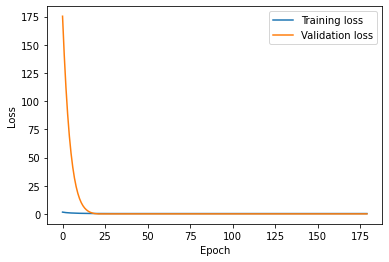

In [45]:
mse = tf.keras.losses.MeanSquaredError(
 reduction=tf.keras.losses.Reduction.SUM)

model.compile(optimizer=opt, loss=mse)
history = model.fit(X_train_norm, y_train, validation_data=(X_test,y_test), epochs=180)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()